In [1]:
# Importing libraries and packages:

from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
 


# Importing required packages and libraries
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras

import math
from sklearn.utils import resample

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from  sklearn.decomposition  import  PCA
from sklearn import svm

import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import scale
 
from  sklearn.model_selection  import  GridSearchCV

import matplotlib.image as mpimg
import random
import os,sys
from scipy import stats
 
from skimage.color import rgb2gray

import re
from keras_preprocessing.image import ImageDataGenerator

import tifffile as tiff
import pandas as pd
from PIL import Image

import matplotlib.pyplot as plt
plt.style.use('default')

from glob import glob

# Importing libraries and packages:

from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
 
from sklearn.svm import SVC
 
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
 
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, plot_confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import roc_curve

import warnings
warnings.simplefilter("ignore", category=DeprecationWarning)

import os
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from  keras.wrappers.scikit_learn  import  KerasClassifier
from  sklearn.model_selection  import  GridSearchCV
from keras.utils import np_utils
from PIL import Image
 
import time


In [2]:

# Set the path to the directory containing the tif images
img_dir = ("C:\\Users\\mseme\\OneDrive\\Documents\\CS5661 Topics in Adv Data Science\\FinalProject_Histopathologic_Cancer_Detection\\Files\\Image")

# Set the path to the CSV file containing the id-label mapping
# result = pd.read_csv("C:/Users/mseme\OneDrive\Documents\CS5661 Topics in Adv Data Science\FinalProject_Histopathologic_Cancer_Detection\Files\BalancedDataCompressedAutoEncoderPlusPCA.csv", index_col=0) 
result = pd.read_csv('BalancedDataCompressedAutoEncoderPlusPCA.csv', index_col=0)

label = result['label']

label
# Load the id-label mapping file into a DataFrame
# id_df = pd.read_csv(id_file,index_col=0)

# id_df
# id_file

# id_file['label'].value_counts()
 

0        1
1        1
2        1
3        0
4        1
        ..
19995    1
19996    1
19997    0
19998    0
19999    1
Name: label, Length: 20000, dtype: int64

In [3]:
label.head()

0    1
1    1
2    1
3    0
4    1
Name: label, dtype: int64

In [4]:
label.describe()

count    20000.000000
mean         0.500000
std          0.500013
min          0.000000
25%          0.000000
50%          0.500000
75%          1.000000
max          1.000000
Name: label, dtype: float64

In [5]:
result

,file name,label,0,1,2,3,4,5,6,7,...,2105,2106,2107,2108,2109,2110,2111,2112,2113,2114
0,fe520665f21f76336f312f8f68bcd4831c057dd5,1,0.177551,-9.586820,-8.566801,-2.741533,4.088705,-2.601283,-2.538927,0.708467,...,-0.081534,-0.002311,-0.057945,0.017998,0.130523,-0.149506,0.013944,-0.100151,0.081980,0.089024
1,7cf8a043a6185d130ac7b3ac29131ef56a0a1dea,1,-2.219753,-8.986357,-7.431108,0.039660,3.985695,-1.272582,1.870875,1.217411,...,0.104494,-0.241981,0.085478,-0.134899,-0.016479,0.083136,-0.155667,-0.050047,0.081754,-0.144524
2,b1bbbb20cf222ebc90058e3b28c1b57d460375a3,1,-7.285353,-4.389901,-2.301738,3.631255,-5.471744,-3.653268,0.952643,-0.615656,...,0.048240,-0.052129,0.172595,-0.095746,0.076016,0.112851,-0.026718,0.071247,-0.051166,0.142570
3,eda2fdea00f4d45ffeab69bef3905bd00439c3f9,0,7.198379,8.367715,-1.824436,0.058183,-0.578592,3.013971,4.789231,1.722777,...,0.130234,-0.018426,0.001495,0.043898,0.018813,-0.057775,0.011729,0.051898,-0.030612,0.071710
4,d7786b09f5fc66182046e4742667a7529a8fa71b,1,-8.866398,15.523893,2.956651,1.666184,-1.177167,-1.440076,6.350306,1.654882,...,-0.057908,0.072258,0.060307,-0.121543,0.086209,0.025314,0.078836,0.083207,-0.023780,0.093864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,ad24cc8089e87731ec6d963dee09e0b697441866,1,-2.386042,15.283563,-0.677916,1.990766,0.924039,3.198889,3.348169,-0.447658,...,0.088011,0.023495,0.037156,-0.036155,0.000122,-0.025709,0.041122,-0.051271,0.058958,0.058770
19996,6a0f67b9058a94ebd4b03662b1817cc39476b4a7,1,0.013430,-1.198561,-3.107152,4.725783,-0.544180,0.520402,1.201299,-0.671730,...,0.035696,0.049471,0.030775,-0.213990,-0.213677,0.187356,0.117131,0.034502,-0.046804,0.120294
19997,5e11ba7e44f309f02f26ec4fd430330f40f16bc2,0,-13.904292,-14.768571,-4.799007,-3.501939,-0.518888,0.456912,-1.825171,-0.374967,...,-0.025817,0.043884,0.053620,0.080060,0.119396,0.185163,-0.049184,0.206338,-0.162770,-0.105561
19998,2b4de74b8920bdc174e9330a916f9903c4001b43,0,22.093441,-0.437056,2.179865,-2.586366,1.197968,-0.401659,1.514603,-4.124180,...,0.007796,0.007779,-0.083116,-0.095148,0.079233,0.035925,0.044013,0.005759,0.001792,-0.166266


In [6]:
result.head()

,file name,label,0,1,2,3,4,5,6,7,...,2105,2106,2107,2108,2109,2110,2111,2112,2113,2114
0,fe520665f21f76336f312f8f68bcd4831c057dd5,1,0.177551,-9.586820,-8.566801,-2.741533,4.088705,-2.601283,-2.538927,0.708467,...,-0.081534,-0.002311,-0.057945,0.017998,0.130523,-0.149506,0.013944,-0.100151,0.081980,0.089024
1,7cf8a043a6185d130ac7b3ac29131ef56a0a1dea,1,-2.219753,-8.986357,-7.431108,0.039660,3.985695,-1.272582,1.870875,1.217411,...,0.104494,-0.241981,0.085478,-0.134899,-0.016479,0.083136,-0.155667,-0.050047,0.081754,-0.144524
2,b1bbbb20cf222ebc90058e3b28c1b57d460375a3,1,-7.285353,-4.389901,-2.301738,3.631255,-5.471744,-3.653268,0.952643,-0.615656,...,0.048240,-0.052129,0.172595,-0.095746,0.076016,0.112851,-0.026718,0.071247,-0.051166,0.142570
3,eda2fdea00f4d45ffeab69bef3905bd00439c3f9,0,7.198379,8.367715,-1.824436,0.058183,-0.578592,3.013971,4.789231,1.722777,...,0.130234,-0.018426,0.001495,0.043898,0.018813,-0.057775,0.011729,0.051898,-0.030612,0.071710
4,d7786b09f5fc66182046e4742667a7529a8fa71b,1,-8.866398,15.523893,2.956651,1.666184,-1.177167,-1.440076,6.350306,1.654882,...,-0.057908,0.072258,0.060307,-0.121543,0.086209,0.025314,0.078836,0.083207,-0.023780,0.093864


In [7]:
result.describe()

,label,0,1,2,3,4,5,6,7,8,...,2105,2106,2107,2108,2109,2110,2111,2112,2113,2114
count,20000.000000,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,...,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04
mean,0.500000,2.088126e-07,-9.166484e-08,-1.363365e-08,1.949323e-08,-3.865410e-08,2.421482e-07,-1.282729e-07,7.775408e-08,-2.262162e-08,...,3.995237e-08,9.920124e-08,-1.547733e-08,1.968654e-08,-2.427242e-09,3.186554e-08,8.509374e-08,1.281236e-08,-8.182578e-08,-5.632186e-08
std,0.500013,1.474024e+01,9.102001e+00,5.039059e+00,3.733585e+00,3.213848e+00,3.195338e+00,2.347137e+00,2.018530e+00,1.987067e+00,...,8.096455e-02,8.086915e-02,8.073678e-02,8.065372e-02,8.053316e-02,8.033270e-02,8.015819e-02,8.008096e-02,7.997957e-02,7.981441e-02
min,0.000000,-4.596950e+01,-2.253896e+01,-1.104017e+01,-1.494886e+01,-2.340400e+01,-2.584538e+01,-1.305435e+01,-1.582628e+01,-1.433706e+01,...,-3.260214e-01,-3.446910e-01,-3.356873e-01,-3.587885e-01,-3.469533e-01,-3.396295e-01,-3.539658e-01,-3.557822e-01,-3.502170e-01,-3.119349e-01
25%,0.000000,-1.109097e+01,-7.444768e+00,-3.316816e+00,-2.250826e+00,-1.211048e+00,-1.264179e+00,-1.370580e+00,-8.672520e-01,-8.947568e-01,...,-5.151960e-02,-5.123389e-02,-5.133718e-02,-5.177023e-02,-5.048248e-02,-5.090635e-02,-5.094431e-02,-5.136374e-02,-5.082025e-02,-5.152954e-02
50%,0.500000,-2.002943e+00,-1.044415e+00,-9.810855e-01,-1.578701e-01,1.877456e-02,-4.557872e-02,8.391320e-02,2.989235e-02,-3.360247e-02,...,-4.782086e-04,5.375167e-05,-1.433565e-04,1.871385e-04,2.811646e-04,-5.335054e-04,4.918452e-06,5.419119e-04,-2.469770e-04,-6.682177e-04
75%,1.000000,9.258100e+00,7.796474e+00,2.659549e+00,2.177795e+00,1.232336e+00,1.149010e+00,1.425016e+00,8.909989e-01,8.343419e-01,...,5.171099e-02,5.130615e-02,5.128162e-02,5.162291e-02,5.086908e-02,5.076226e-02,5.085868e-02,5.055725e-02,4.971059e-02,5.082354e-02
max,1.000000,4.747200e+01,2.279270e+01,5.523403e+01,1.752578e+01,2.500739e+01,2.595269e+01,1.506131e+01,1.606234e+01,1.883499e+01,...,3.556041e-01,3.802525e-01,3.685075e-01,3.648540e-01,4.047183e-01,4.578056e-01,4.466569e-01,3.734620e-01,3.989320e-01,3.654689e-01


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split((result[result.columns[2:]]), label, test_size=0.3, random_state=1)

In [10]:
print(X_train)

               0          1         2          3         4         5  \
11408  -2.248636  -9.143990 -7.781368  -1.733500 -0.840036 -0.098615   
3616   -8.405453  12.071984 -1.743248  -3.189389 -1.163217  0.895615   
9747   21.492823   3.005786  3.347923  -1.100967 -1.638999  4.087186   
6915  -12.314317  -3.291711  0.536032   5.664044  3.613076  2.868855   
4888   -3.691460   9.611960 -2.253286  -1.473136 -0.828848  0.198434   
...          ...        ...       ...        ...       ...       ...   
10955   1.250090   6.814649 -0.973645  11.783412 -0.390814  0.898112   
17289 -14.840370   0.456261  4.888221   9.242828 -1.943980 -2.678756   
5192   -3.879322   1.898334 -2.188115   5.584607  2.923353  2.372623   
12172  -2.521931   0.534134 -2.666053   5.133602 -2.017707 -6.379038   
235     7.683032  10.980227 -1.188711   0.604425  2.099032  2.426074   

              6         7         8         9  ...      2105      2106  \
11408 -1.097777 -0.100142 -0.012249 -0.151186  ... -0.061065 

In [11]:
print(X_test)

               0          1          2         3         4         5  \
11456  -5.786971  15.892533  -0.990600  0.177045 -1.172815  1.928713   
16528 -15.800930 -12.090265  -0.897042 -0.139967 -1.990583 -4.482400   
3253   21.760777  -1.699984   3.787650  1.380079 -5.518615  1.712931   
18614  -9.435073  -3.035465  -3.264546  4.533225  0.880271 -1.044563   
1544    3.476434  10.189993  -3.258479 -1.772435  0.122395  0.232063   
...          ...        ...        ...       ...       ...       ...   
12696   8.022386  -4.826607  -2.647975  1.400437 -6.806574  3.003703   
14288  -0.626596   0.486542  -3.666177  5.307048 -0.378192 -0.583206   
18768 -21.056020   4.791933   9.517598 -5.331087  1.071535 -2.912932   
3950  -13.447669 -10.114277  -4.235023 -1.196568 -0.561449 -1.816325   
8871   38.799770  -5.864591  11.868583 -1.157948  0.524142 -0.593029   

              6         7         8         9  ...      2105      2106  \
11456 -0.535719 -0.794647 -0.070952  0.627668  ...  0.035518 

In [12]:
print(y_train)

11408    1
3616     1
9747     1
6915     1
4888     1
        ..
10955    1
17289    1
5192     1
12172    1
235      1
Name: label, Length: 14000, dtype: int64


In [13]:
print(y_test)

11456    1
16528    1
3253     0
18614    1
1544     1
        ..
12696    1
14288    1
18768    0
3950     1
8871     0
Name: label, Length: 6000, dtype: int64


In [14]:
# results to be able too print and compare them later

printResults = []

In [15]:
# decision tree classifier object
dTree = DecisionTreeClassifier(random_state=1)

# fitting/training dataset
dTree.fit(X_train, y_train)

# predicting the labels
y_predict = dTree.predict(X_test)

# calculating the accuracy
score = accuracy_score(y_test, y_predict)
print("The Decision Tree Accuracy Score is: " + str(score))

The Decision Tree Accuracy Score is: 0.7205


In [16]:
# estimating the probability 
y_predict_prob = dTree.predict_proba(X_test)

# calculating false and true positive rates
fpr_dtree, tpr_dtree, thresholds = metrics.roc_curve(y_test, y_predict_prob[:,1], pos_label=1)

print(fpr_dtree)
print("\n")
print(tpr_dtree)

[0.         0.27785146 1.        ]


[0.         0.71883378 1.        ]


In [17]:
# AUC
AUC_dtree = metrics.auc(fpr_dtree, tpr_dtree)
print("AUC: " + str(AUC_dtree))

AUC: 0.720491160637458


In [18]:
printResults.append("Decision Tree:\tAccuracy: " + str(score) + "\tAUC: " + str(AUC_dtree))

In [19]:
print(printResults)

['Decision Tree:\tAccuracy: 0.7205\tAUC: 0.720491160637458']


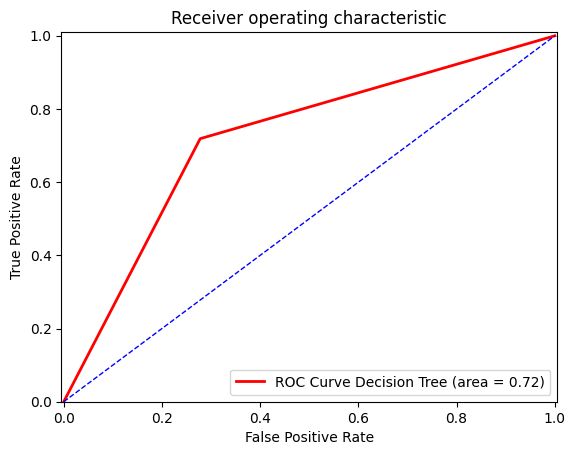

In [20]:
# Importing the "pyplot" package of "matplotlib" library of python to generate 
# graphs and plot curves:
import matplotlib.pyplot as plt

# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
# rather than openng a new figure window:
%matplotlib inline

plt.figure()

# Roc Curve:

plt.plot(fpr_dtree, tpr_dtree, color='red', lw=2, 
         label='ROC Curve Decision Tree (area = %0.2f)' % AUC_dtree)

# plt.plot(fpr, tpr, color='red', lw=2, 
         # label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

In [21]:
for results in printResults:
    print(results)

Decision Tree:	Accuracy: 0.7205	AUC: 0.720491160637458


In [22]:
# 1 Hidden Layer with 100 neurons:
my_ANN = MLPClassifier(hidden_layer_sizes=(100,), activation= 'logistic', 
                       solver='adam', alpha=1, random_state=1, 
                       learning_rate_init = 0.2, verbose=True)

In [23]:
# Training ONLY on the training set:
my_ANN.fit(X_train, y_train)


Iteration 1, loss = 2.35700550
Iteration 2, loss = 0.97308977
Iteration 3, loss = 1.02964507
Iteration 4, loss = 0.99779712
Iteration 5, loss = 0.99950571
Iteration 6, loss = 0.97614558
Iteration 7, loss = 1.03093621
Iteration 8, loss = 1.02364167
Iteration 9, loss = 0.95783700
Iteration 10, loss = 0.94568937
Iteration 11, loss = 0.93960182
Iteration 12, loss = 0.94448884
Iteration 13, loss = 0.90788787
Iteration 14, loss = 0.90458522
Iteration 15, loss = 0.91316952
Iteration 16, loss = 0.88554777
Iteration 17, loss = 0.90027224
Iteration 18, loss = 0.87717301
Iteration 19, loss = 0.87540997
Iteration 20, loss = 0.88467416
Iteration 21, loss = 0.87751886
Iteration 22, loss = 0.87389219
Iteration 23, loss = 0.86361880
Iteration 24, loss = 0.86195141
Iteration 25, loss = 0.85394997
Iteration 26, loss = 0.85731573
Iteration 27, loss = 0.85239546
Iteration 28, loss = 0.84546812
Iteration 29, loss = 0.84819344
Iteration 30, loss = 0.81407847
Iteration 31, loss = 0.80850198
Iteration 32, los

MLPClassifier(activation='logistic', alpha=1, learning_rate_init=0.2,
              random_state=1, verbose=True)

In [24]:
# Weights:
print(my_ANN.coefs_)
# The ith element in the list represents the weight matrix corresponding to layer i.

print('\n')

# Bias weights:
print(my_ANN.intercepts_)
# The ith element in the list represents the bias vector corresponding to layer i + 1.

[array([[ 1.03959562e-04, -5.10463004e-07, -7.15754172e-04, ...,
        -5.49652278e-04, -2.28321343e-06, -1.49454144e-06],
       [ 4.88042004e-04,  1.21782484e-06,  6.22754487e-04, ...,
         5.44618598e-04,  4.74407721e-06,  2.29577173e-06],
       [ 1.46183541e-03,  1.28906982e-06,  8.86522993e-04, ...,
         8.84533454e-04,  8.77107953e-06,  3.03415219e-06],
       ...,
       [-1.09503112e-03,  2.82339611e-06, -3.30741348e-04, ...,
        -8.70158751e-05,  4.34320834e-06, -3.61302803e-05],
       [ 1.37502255e-03,  4.63711481e-04, -1.69071430e-03, ...,
        -6.02831646e-04, -1.19199931e-05,  1.45738492e-06],
       [-5.31181406e-04, -1.40973678e-04,  6.76566199e-04, ...,
         9.85769381e-03,  1.79562581e-05, -1.14593389e-05]]), array([[ 3.42739837e-03],
       [ 1.39319885e-04],
       [ 4.14524221e-03],
       [-7.66991892e-01],
       [ 2.22396719e-03],
       [ 3.26881230e-03],
       [ 3.23425622e-03],
       [ 3.20227670e-03],
       [ 2.42006470e-03],
       

In [25]:
# Testing on the testing set:
y_predict_ann = my_ANN.predict(X_test)
print(y_predict_ann)

[1 0 0 ... 0 0 0]


In [26]:
# We can now compare the "predicted labels" for the Testing Set with its "actual labels" to evaluate the accuracy 

score_ann = accuracy_score(y_test, y_predict_ann)
print('\n','accuracy: ',score_ann)



 accuracy:  0.767


In [27]:
# "my_ANN" is instantiated as an "object" of MLPClassifier "class". 
# hidden_layer_sizes: The ith element represents the number of neurons in the ith hidden layer.
# activation: the non-linear function. 'logistic' means Sigmoid Function!
# solver: the type of minimization problem: ‘sgd’ and 'adam' refer to stochastic gradient descent.
# alpha: regularization parameter (L2 penalty term).
# learning_rate_init: learning rate.

# 2 Hidden Layers, first one with 6 neurons, second with 4 neurons:
my_ANN = MLPClassifier(hidden_layer_sizes=(6,4), activation= 'logistic', 
                       solver='adam', alpha=1e-5, random_state=1, 
                       learning_rate_init = 0.1, verbose=True, tol=0.0001)

# Training ONLY on the training set:
my_ANN.fit(X_train, y_train)
# Testing on the testing set:
y_predict_ann = my_ANN.predict(X_test)
#print(y_predict_ann)
# We can now compare the "predicted labels" for the Testing Set with its "actual labels" to evaluate the accuracy 
score_ann = accuracy_score(y_test, y_predict_ann)
print('\n','accuracy: ',score_ann)

Iteration 1, loss = 0.54781077
Iteration 2, loss = 0.46494686
Iteration 3, loss = 0.43922183
Iteration 4, loss = 0.41980818
Iteration 5, loss = 0.40357395
Iteration 6, loss = 0.39114533
Iteration 7, loss = 0.38272804
Iteration 8, loss = 0.37379194
Iteration 9, loss = 0.36366093
Iteration 10, loss = 0.35824463
Iteration 11, loss = 0.35382858
Iteration 12, loss = 0.34337288
Iteration 13, loss = 0.34317322
Iteration 14, loss = 0.33969173
Iteration 15, loss = 0.33432992
Iteration 16, loss = 0.33223551
Iteration 17, loss = 0.32860655
Iteration 18, loss = 0.32255852
Iteration 19, loss = 0.31718683
Iteration 20, loss = 0.31985792
Iteration 21, loss = 0.31591662
Iteration 22, loss = 0.31092590
Iteration 23, loss = 0.31339170
Iteration 24, loss = 0.31404041
Iteration 25, loss = 0.31380763
Iteration 26, loss = 0.31417197
Iteration 27, loss = 0.30592590
Iteration 28, loss = 0.30422410
Iteration 29, loss = 0.30259286
Iteration 30, loss = 0.30382080
Iteration 31, loss = 0.29652643
Iteration 32, los

In [28]:
# Weights:
print(my_ANN.coefs_)
# The ith element in the list represents the weight matrix corresponding to layer i.

print('\n')

# Bias weights:
print(my_ANN.intercepts_)
# The ith element in the list represents the bias vector corresponding to layer i + 1.

[array([[  5.43195858,   2.43820512,  -1.08909865,   5.36409866,
         10.96131381,   3.44980403],
       [ -4.93622282,  -4.01714835,   4.13203552,  -5.25267361,
         10.20009954,  10.43037661],
       [  2.92489267,   7.02980151, -11.10300223,  10.12179612,
         -4.74677629,   7.25201483],
       ...,
       [  5.48614275,   2.88312597,   5.48703034,  -9.15224942,
         15.37162559,   3.87196697],
       [  0.16060113,  -8.53774401,  11.73475141,   0.48307759,
         11.03932304, -18.66943038],
       [-22.34005406,   3.69902548,  -4.14790876, -10.38083351,
         -5.88350463,   4.59559985]]), array([[ -7.53901216,   2.27252738,   0.8458054 ,  -7.19895791],
       [ -4.12616237,   1.6196295 ,   7.93220577,  -4.81694078],
       [  0.06857299,  -1.67162238, -11.71941959,   2.44802529],
       [ -5.84163542,   4.6823384 ,   4.63352094,  -3.07381551],
       [ -0.99936092, -12.82230485,  -5.76927096,  -6.88830144],
       [  6.20986939,   7.71042249,  -2.34590134,   4.

In [29]:
# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_ann = my_ANN.predict_proba(X_test)
print(y_predict_ann,'\n')
print(y_predict_prob_ann)

[1 0 0 ... 0 0 0] 

[[0.01671464 0.98328536]
 [0.84762101 0.15237899]
 [0.96323919 0.03676081]
 ...
 [0.58292951 0.41707049]
 [0.96398814 0.03601186]
 [0.96323919 0.03676081]]


In [30]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_ann[:,1], pos_label=1)

print(fpr)
print("\n\n\n")
print(tpr)

[0.         0.00895225 0.00928382 ... 0.99966844 0.99966844 1.        ]




[0.         0.17627346 0.17928954 ... 0.99966488 1.         1.        ]


In [31]:
# AUC:
AUC = metrics.auc(fpr, tpr)
print(AUC)

0.8255353152267442


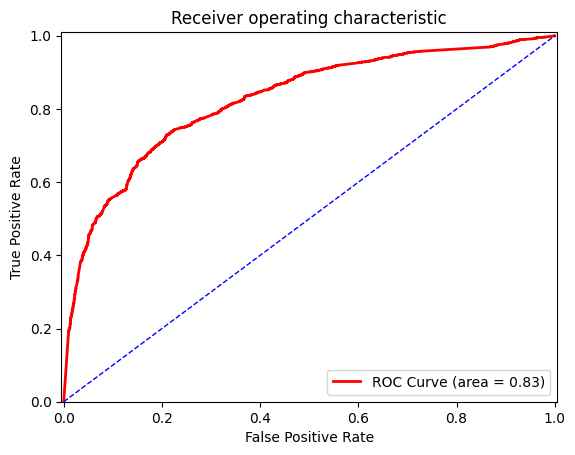

In [32]:
# Importing the "pyplot" package of "matplotlib" library of python to generate 
# graphs and plot curves:
import matplotlib.pyplot as plt

# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
# rather than openng a new figure window:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

In [33]:
# importing the method:
from sklearn.model_selection import cross_val_score

In [34]:
# Set the path to the directory containing the tif images
img_dir = ("C:\\Users\\mseme\\OneDrive\\Documents\\CS5661 Topics in Adv Data Science\\FinalProject_Histopathologic_Cancer_Detection\\Files\\Image")

# Set the path to the CSV file containing the id-label mapping
# result = pd.read_csv("C:/Users/mseme\OneDrive\Documents\CS5661 Topics in Adv Data Science\FinalProject_Histopathologic_Cancer_Detection\Files\BalancedDataCompressedAutoEncoderPlusPCA.csv", index_col=0) 
result = pd.read_csv('BalancedDataCompressedAutoEncoderPlusPCA.csv', index_col=0)

label = result['label']


In [35]:
# Applying 10-fold cross validation with ANN classifier:

# 2 Hidden Layers, first one with 6 neurons, second with 4 neurons:
my_ANN = MLPClassifier(hidden_layer_sizes=(6,4), activation= 'logistic', 
                       solver='adam', alpha=1e-5, random_state=1, 
                       learning_rate_init = 0.1, verbose=True, tol=0.0001)

In [36]:
accuracy_list = cross_val_score(my_ANN, result, label, cv=10, scoring='accuracy')


C:\Users\mseme\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mseme\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mseme\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 752, in fit
    return self._fit(X, y, incremental=False)
  File "C:\Users\mseme\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 393, in _fit
    X, y = self._validate_

In [ ]:
from sklearn.model_selection import GridSearchCV

# define a range for the "number of neurons" in the hidden layer for a network with 1 hidden layer:
neuron_number = [(i,) for i in range(2,9)]

# create a dictionary for grid parameter:
param_grid = dict(hidden_layer_sizes = neuron_number)
print(param_grid,'\n')

# instantiate the model:
my_ANN = MLPClassifier(activation='logistic', solver='adam', 
                                         alpha=1e-5, random_state=1, 
                                          learning_rate_init = 0.1,
                                          verbose=False, tol=0.0001, max_iter=400)

# creat the grid, and define the metric for evaluating the model: 
grid = GridSearchCV(my_ANN, param_grid, cv=10, scoring='accuracy', error_score='raise')

# fit the grid (start the grid search):
grid.fit(result, label)

# view the results:
#print(grid.cv_results_)

# view the best results corresponding to the best structure of ANN:
print(grid.best_score_)
print(grid.best_params_)

In [39]:
from sklearn.model_selection import GridSearchCV

# define a range for the "number of neurons" in the hidden layer for a network with 1 hidden layer:
neuron_number = [(i,j) for i in range(1,9) for j in range(1,9)]                    

# create a dictionary for grid parameter:
param_grid = dict(hidden_layer_sizes = neuron_number)
print(param_grid,'\n')

# instantiate the model:
my_ANN = MLPClassifier(activation='logistic', solver='adam', 
                                         alpha=1e-5, random_state=1, 
                                         learning_rate_init = 0.1, max_iter=400)

# creat the grid, and define the metric for evaluating the model: 
grid = GridSearchCV(my_ANN, param_grid, cv=10, scoring='accuracy')

# fit the grid (start the grid search):
grid.fit(result, label)

# view the results:
# print(grid.cv_results_)

# view the best results corresponding to the best structure of ANN:
print(grid.best_score_)
print(grid.best_params_)

{'hidden_layer_sizes': [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8)]} 



C:\Users\mseme\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
640 fits failed out of a total of 640.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
64 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mseme\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mseme\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 752, in fit
    return self._fit(X, y, incremental=False)
  File "C:\Users\mseme\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 393, in _fit
    X, y = self._valida

ValueError: could not convert string to float: 'fe520665f21f76336f312f8f68bcd4831c057dd5'